In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb


from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression

# checking on train data

In [ ]:
df=pd.read_csv('Train.csv')
df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3132 non-null   object 
 1   B       3132 non-null   float64
 2   C       3132 non-null   float64
 3   D       3132 non-null   float64
 4   E       3132 non-null   float64
 5   F       3132 non-null   float64
 6   G       3132 non-null   float64
 7   H       3132 non-null   float64
 8   Target  3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [ ]:
#From the dataset it is clear that we have one categorical variable and rest continuous variable
#checking unique values in categorical variable
df['A'].unique()

array(['F', 'M', 'I'], dtype=object)

In [ ]:
#we need to do onehot encoding of this categorical variable

In [ ]:
#using get dummies for one hot encoding
df1 = pd.get_dummies(df, columns=['A'])
df1.head()

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,1,0,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,1,0,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,0,0,1


In [ ]:
#Need to drop one column among A_F,A_I and A_M because one is dependent on other two
df1 = df1.drop('A_I', axis=1)
df1.head()

,B,C,D,E,F,G,H,Target,A_F,A_M
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,1,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,1,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,0,1


In [ ]:
df1.describe()

,B,C,D,E,F,G,H,Target,A_F,A_M
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351,9.964879,0.316411,0.366858
std,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567,3.229146,0.465150,0.482024
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000,10.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000


In [ ]:
#checking for missing value
df1.isnull().sum()

B         0
C         0
D         0
E         0
F         0
G         0
H         0
Target    0
A_F       0
A_M       0
dtype: int64

***Since there's no missing value we can now try different model on this featurised data***

In [ ]:
#defining independent and dependent variable for model
X_train=df1.drop('Target', axis=1)
y_train=df1['Target']

In [ ]:
X_train

,B,C,D,E,F,G,H,A_F,A_M
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,1,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,1,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,0,1
...,...,...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,1,0
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,1,0
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,0,1
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,0,1


# checking on test data

In [ ]:
df_test=pd.read_csv('Test.csv')

In [ ]:
df_test.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [ ]:
#saving index column
test_index=df_test['Index']

In [ ]:
#removing index column
df_test_no_index=df_test.drop('Index',axis=1)
df_test_no_index.head()

,A,B,C,D,E,F,G,H
0,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [ ]:
#using get dummies for one hot encoding of column A
df_test_new=pd.get_dummies(df_test_no_index, columns=['A'])
df_test_new.head()

,B,C,D,E,F,G,H,A_F,A_I,A_M
0,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,0,0,1
1,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,0,0,1
2,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,1,0,0
3,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,1,0,0
4,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,0,0,1


In [ ]:
#Need to drop one column among A_F,A_I and A_M because one is dependent on other two
X_test = df_test_new.drop('A_I', axis=1)
X_test.head()

,B,C,D,E,F,G,H,A_F,A_M
0,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,0,1
1,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,0,1
2,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,1,0
3,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,1,0
4,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,0,1


## Splitting the training dataset  

In [ ]:
# splititng the dataset into train and validation set (80% train and 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state=42)

In [ ]:
#defining a function to return rmse for given model
def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse=mean_squared_error(y_val, y_pred)
    error=np.sqrt(mse)
    print('rmse of',model,'is:',error)
    return error


# Trying out Different models

### 1. Ridge regression

**hyperparameter tunning using GridsearchCV**

In [ ]:
# trying for all different alpha value as parametr
parameters = {'alpha': [0.001,0.01,0.1, 1, 10, 100]}

#setting model
model = Ridge()

#defining gridsearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

#fitting gridsearchcv on training data
grid_search.fit(X_train, y_train)

getting the best hyperparameters
best_parameters = grid_search.best_params_
best_parameters

**best parameter**

In [ ]:
alpha=0.01

In [ ]:
#checking performance of model with obtained best_parameters on validation set
ridge=Ridge(alpha=0.01)

#Using our function to get rmse
rmse(ridge)

rmse of Ridge(alpha=0.01) is: 2.4407145179170917


2.4407145179170917

**prediction**

In [ ]:
#predicting values on given test data
y_test=ridge.predict(X_test)

In [ ]:
#Creating dataframe in the format given in competition
resultridge = pd.DataFrame(test_index, columns = ['Index'])
resultridge['Target']= y_test

In [ ]:
resultridge

,Index,Target
0,866,11.797341
1,1483,10.247326
2,599,14.795183
3,1702,12.078902
4,670,11.501735
...,...,...
1040,532,9.197001
1041,3417,9.709028
1042,1505,12.483326
1043,2245,11.228081


In [ ]:
#Saving into CSV file for submitting prediction
resultridge.to_csv("2713_Satishridge.csv", index=False)

***

### 2. KNN

**Hyperparameter tunning**

*Approach-1 : Elbow method*

Text(0, 0.5, 'MSE')

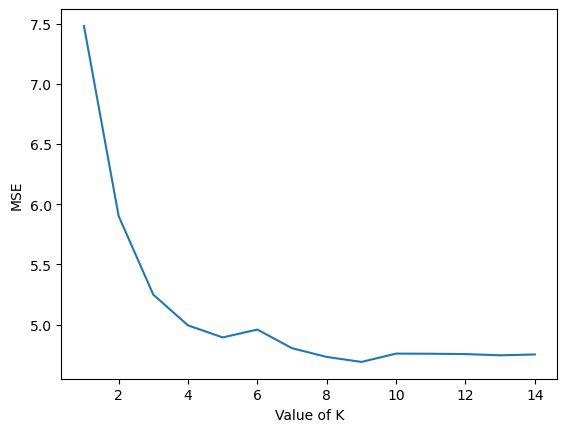

In [ ]:
Range_k = range(1,15)

scores_list = []

for k in Range_k:
   regressor=KNeighborsRegressor(n_neighbors=k)
   regressor.fit(X_train, y_train)
   y_pred=regressor.predict(X_val)
   scores_list.append(mean_squared_error(y_val,y_pred))

%matplotlib inline
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("MSE")

**from above graph**
- best_k=9

***

*Approach-2 : GridsearchCV*

In [ ]:
#setting all different parameter values
parameters = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski']}

# Creating KNN regressor
model = KNeighborsRegressor()

# defining GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**from here also**
- best_k=9
- metric='euclidean' is there by-default

**Best parameter**

In [ ]:
best_k=9

In [ ]:
#checking performance of model with obtained best_parameters on validation set
KNN=KNeighborsRegressor(n_neighbors=best_k)

#Using our function to get rmse
rmse(KNN)

rmse of KNeighborsRegressor(n_neighbors=9) is: 2.1655451779300505


2.1655451779300505

**Prediction**

In [ ]:
#predicting values on given test data
y_test=KNN.predict(X_test)

In [ ]:
resultKNN = pd.DataFrame(test_index, columns = ['Index'])
resultKNN['Target']= y_test

In [ ]:
resultKNN

,Index,Target
0,866,11.777778
1,1483,10.000000
2,599,13.444444
3,1702,10.333333
4,670,12.555556
...,...,...
1040,532,8.777778
1041,3417,9.666667
1042,1505,11.222222
1043,2245,9.555556


In [ ]:
resultKNN.to_csv("2713_SatishKNN.csv", index=False)

***

### 3. Naive Bayes

**hyperparameter Tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'var_smoothing': [1e-9,1e-3,0.01,0.1,1,10], 'priors': [None, np.ones(2)/2]}

# Creating the GNB regressor
model = GaussianNB()

# defining GridSearch
grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5)

# Fitting the GridSearchCV  to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**Best Parameter**

In [ ]:
best_smoothing=1

In [ ]:
#checking performance of model with obtained best_parameters on validation set
GNB=GaussianNB(var_smoothing=best_smoothing)

#Using our function to get rmse
rmse(GNB)

rmse of GaussianNB(var_smoothing=1) is: 2.9858785130038132


2.9858785130038132

**Prediction**

In [ ]:
#predicting values on given test data
y_test=GNB.predict(X_test)

In [ ]:
resultGNB = pd.DataFrame(test_index, columns = ['Index'])
resultGNB['Target']= y_test

In [ ]:
resultGNB

,Index,Target
0,866,9
1,1483,9
2,599,9
3,1702,10
4,670,8
...,...,...
1040,532,8
1041,3417,9
1042,1505,10
1043,2245,8


In [ ]:
resultGNB.to_csv("2713_SatishGNB.csv", index=False)

***

### 4. SVR

**Hyperparameter Tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'C': [0.001,0.01,0.1,1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Creating the SVR regressor
model = SVR()

# defining the GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Obtaining best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**best paramter**
- gamma and kernel is by-default values

In [ ]:
best_c=100

In [ ]:
#checking performance of model with obtained best_parameters on validation set
SVR=SVR(C=best_c)

#Using our function to get rmse
rmse(SVR)

rmse of SVR(C=100) is: 2.147282486624802


2.147282486624802

**Prediction**

In [ ]:
#predicting values on given test data
y_test=SVR.predict(X_test)

In [ ]:
resultSVR = pd.DataFrame(test_index, columns = ['Index'])
resultSVR['Target']= y_test

In [ ]:
resultSVR

,Index,Target
0,866,11.894556
1,1483,9.682417
2,599,15.240459
3,1702,11.177500
4,670,11.315117
...,...,...
1040,532,8.632875
1041,3417,9.267676
1042,1505,11.647767
1043,2245,11.567817


In [ ]:
resultSVR.to_csv("2713_SatishSVR.csv", index=False)

***

### 5. Decision tree

**Hyperparameter Tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = { 'max_depth': [None,3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5],'random_state':[1]}

# Creating the decision tree regressor
model = DecisionTreeRegressor()

# Defining the GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**best parameter**

In [ ]:
max_depth=5
min_samples_leaf=5
min_samples_split=10

In [ ]:
#checking performance of model with obtained best_parameters on validation set
DT=DecisionTreeRegressor(max_depth=5,min_samples_leaf=5,min_samples_split=10,random_state=1)

#Using our function to get rmse
rmse(DT)

rmse of DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=1) is: 2.3129890352702946


2.3129890352702946

**Prediction**

In [ ]:
#predicting values on given test data
y_test=DT.predict(X_test)

In [ ]:
resultDT = pd.DataFrame(test_index, columns = ['Index'])
resultDT['Target']= y_test

In [ ]:
resultDT

,Index,Target
0,866,11.757732
1,1483,9.630631
2,599,14.837838
3,1702,12.705882
4,670,10.500000
...,...,...
1040,532,9.000000
1041,3417,10.228495
1042,1505,12.705882
1043,2245,10.500000


In [ ]:
resultDT.to_csv("2713_SatishDT.csv", index=False)

***

# Ensemble models

### 6. Random Forest

**Hyperparameter Tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'n_estimators': [10, 50, 100,200,300], 'max_depth': [None,3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5],'max_features': ['auto', 'sqrt'],'random_state':[1]}

# Creating the random forest Regressor
model = RandomForestRegressor()

# defining GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**Best Parameter**

In [ ]:
max_depth= None
max_features='sqrt'
min_samples_leaf= 5
min_samples_split=2
min_samples_split= 300

In [ ]:
#checking performance of model with obtained best_parameters on validation set
RF=RandomForestRegressor(n_estimators=300,min_samples_split=2,min_samples_leaf=5,max_features='sqrt',random_state=1)

#Using our function to get rmse
rmse(RF)

rmse of RandomForestRegressor(max_features='sqrt', min_samples_leaf=5, n_estimators=300,
                      random_state=1) is: 2.0938970330162943


2.0938970330162943

**Prediction**

In [ ]:
#predicting values on given test data
y_test=RF.predict(X_test)

In [ ]:
resultRF = pd.DataFrame(test_index, columns = ['Index'])
resultRF['Target']= y_test

In [ ]:
resultRF

,Index,Target
0,866,12.360486
1,1483,9.797480
2,599,14.593650
3,1702,11.360998
4,670,12.156010
...,...,...
1040,532,9.629731
1041,3417,9.489628
1042,1505,12.027566
1043,2245,12.266960


In [ ]:
resultRF.to_csv("2713_SatishRF.csv", index=False)

***

### 7. Adaboost

**Hyperparameter Tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'n_estimators': [10, 50, 100,200,300], 'learning_rate': [0.01, 0.1, 1.0],'random_state':[1]}

# Creating the Adaboost Regressor
model = AdaBoostRegressor()

# defining GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**Best parameter**

In [ ]:
learning_rate= 0.01
n_estimators= 300

In [ ]:
#checking performance of model with obtained best_parameters on validation set
ADB=AdaBoostRegressor(learning_rate= 0.01,n_estimators= 300,random_state=1)

#Using our function to get rmse
rmse(ADB)

rmse of AdaBoostRegressor(learning_rate=0.01, n_estimators=300, random_state=1) is: 2.291194843679321


2.291194843679321

**Prediction**

In [ ]:
#predicting values on given test data
y_test=ADB.predict(X_test)

In [ ]:
resultADB = pd.DataFrame(test_index, columns = ['Index'])
resultADB['Target']= y_test

In [ ]:
resultADB

,Index,Target
0,866,11.406281
1,1483,10.693348
2,599,12.455182
3,1702,11.934066
4,670,11.107542
...,...,...
1040,532,9.689127
1041,3417,10.988266
1042,1505,12.085402
1043,2245,11.144970


In [ ]:
resultADB.to_csv("2713_SatishADB.csv", index=False)

***

### 8. XGBOOST

**Hyperparameter tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'n_estimators': [10, 50, 100,200,300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1.0], 'gamma': [0, 0.1, 0.5], 'subsample': [0.5, 1.0], 'colsample_bytree': [0.5, 1.0],'random_state':[1]}

# Creating the XGBoost regressor
model = xgb.XGBRegressor()

# Creating the GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**Best parameter**

In [ ]:
colsample_bytree= 1.0
gamma= 0.1
learning_rate= 0.1
max_depth= 3
n_estimators= 100
subsample= 0.5

In [ ]:
#checking performance of model with obtained best_parameters on validation set
XGB=xgb.XGBRegressor(colsample_bytree= 1.0,gamma= 0.1,learning_rate= 0.1,max_depth= 3,n_estimators= 100,subsample= 0.5,random_state=1)

#Using our function to get rmse
rmse(XGB)

rmse of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...) is: 2.154364866574216


2.154364866574216

**Prediction**

In [ ]:
#predicting values on given test data
y_test=XGB.predict(X_test)

In [ ]:
resultXGB = pd.DataFrame(test_index, columns = ['Index'])
resultXGB['Target']= y_test

In [ ]:
resultXGB

,Index,Target
0,866,11.832329
1,1483,9.965193
2,599,15.727744
3,1702,11.359832
4,670,11.774426
...,...,...
1040,532,9.338075
1041,3417,9.682284
1042,1505,12.333086
1043,2245,12.092999


In [ ]:
resultXGB.to_csv("2713_SatishXGB.csv", index=False)

***

### 9. gradient boosting

**Hyperparameter tunning**

In [ ]:
# Creating the hyperparameter dictionary
parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None,3, 5, 7], 'learning_rate': [0.01, 0.1, 1.0], 'subsample': [0.5, 1.0], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5],'random_state':[1]}

# Creating the GradientBoostingRegressor
model = GradientBoostingRegressor()

# defining GridSearch
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_parameters = grid_search.best_params_

print(best_parameters)

**Best parameter**

In [ ]:
learning_rate= 0.1
max_depth= 3
min_samples_leaf=5
min_samples_split=10
n_estimators= 100
subsample= 0.5

In [ ]:
#checking performance of model with obtained best_parameters on validation set
GB=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=5,min_samples_split=10,n_estimators=100,subsample=0.5,random_state=1)

#Using our function to get rmse
rmse(GB)

rmse of GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          random_state=1, subsample=0.5) is: 2.144654300867435


2.144654300867435

**Prediction**

In [ ]:
#predicting values on given test data
y_test=GB.predict(X_test)

In [ ]:
resultGB = pd.DataFrame(test_index, columns = ['Index'])
resultGB['Target']= y_test

In [ ]:
resultGB

,Index,Target
0,866,11.737852
1,1483,9.870479
2,599,15.865937
3,1702,12.065786
4,670,11.877175
...,...,...
1040,532,9.195880
1041,3417,9.889817
1042,1505,12.604750
1043,2245,12.535594


In [ ]:
resultGB.to_csv("2713_SatishGB.csv", index=False)

***

#### All model performance till Now

- Ridge(rmse=2.441)
- KNN(rmse=2.165)
- GNB(rmse=2.986)
- SVR(rmse=2.147)
- DT(rmse=2.313)
- RF(rmse=2.094)
- ADB(rmse=2.291)
- XGB(rmse=2.154)
- GB(rmse=2.145)

**Best 5 models till now are:**

1. RF (2.094)
2. GB  (2.145)
3. SVR (2.147)
4. XGB (2.154)
5. KNN (2.165)

### 10. Stacking

In [ ]:
base_models = [('random_forest', RandomForestRegressor(n_estimators=300,min_samples_split=2,min_samples_leaf=5,max_features='sqrt')),
    ('SVR', SVR(C=100)),
    ('GB',GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=5,min_samples_split=10,n_estimators=100,subsample=0.5)),
    ('XGB',xgb.XGBRegressor(colsample_bytree= 1.0,gamma= 0.1,learning_rate= 0.1,max_depth= 3,n_estimators= 100,subsample= 0.5,random_state=1))]

# Define the meta-model
meta_model = RandomForestRegressor()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models,final_estimator=meta_model)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = stacking_regressor.predict(X_val)

# Calculate the mean squared error (MSE) on the validation set
mse = mean_squared_error(y_val, y_pred)

# Calculate the root mean squared error (RMSE)
error = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", error)

Root Mean Squared Error (RMSE): 2.1889027787456983


**Prediction**

In [ ]:
#predicting values on given test data
y_test=stacking_regressor.predict(X_test)

In [ ]:
resultSR = pd.DataFrame(test_index, columns = ['Index'])
resultSR['Target']= y_test

In [ ]:
resultSR

,Index,Target
0,866,11.88
1,1483,9.74
2,599,14.00
3,1702,12.11
4,670,12.10
...,...,...
1040,532,9.26
1041,3417,9.96
1042,1505,12.07
1043,2245,11.47


In [ ]:
resultSR.to_csv("2713_SatishSR.csv", index=False)